<a href="https://colab.research.google.com/github/diezeJhon/kaggle/blob/main/Rainfall_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Prediction with a Rainfall Dataset

In [145]:
import os
import gdown
import pandas as pd

# Create the directory for storing files
DATA_DIR = "data"
os.makedirs(DATA_DIR, exist_ok=True)

# Google Drive file IDs (replace with actual IDs)
TRAIN_FILE_ID = "1D9tUDHhNVUqNrKxpZhNRZ50J9tYqd-fW"
TEST_FILE_ID = "1ofU9_xRpb7EOGJOJxOFGY2ZYIelylptk"

# File paths
train_output = os.path.join(DATA_DIR, "train.csv")
test_output = os.path.join(DATA_DIR, "test.csv")

# Download train.csv
print("📥 Downloading train.csv...")
gdown.download(f"https://drive.google.com/uc?id={TRAIN_FILE_ID}", train_output, quiet=False)

# Download test.csv
print("📥 Downloading test.csv...")
gdown.download(f"https://drive.google.com/uc?id={TEST_FILE_ID}", test_output, quiet=False)

# Load into Pandas DataFrame
print("📊 Loading data into DataFrames...")
df_train = pd.read_csv(train_output,index_col="id")
df_test = pd.read_csv(test_output,index_col="id")

# Confirm shapes
print("\n✅ Files downloaded successfully!")
print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")

# Optional: Preview the first few rows
print("\n🔎 Preview of Train DataFrame:")
print(df_train.head(1))
print("\n🔎 Preview of Test DataFrame:")
print(df_test.head(1))


📥 Downloading train.csv...


Downloading...
From: https://drive.google.com/uc?id=1D9tUDHhNVUqNrKxpZhNRZ50J9tYqd-fW
To: /content/data/train.csv
100%|██████████| 135k/135k [00:00<00:00, 69.6MB/s]


📥 Downloading test.csv...


Downloading...
From: https://drive.google.com/uc?id=1ofU9_xRpb7EOGJOJxOFGY2ZYIelylptk
To: /content/data/test.csv
100%|██████████| 43.9k/43.9k [00:00<00:00, 37.3MB/s]

📊 Loading data into DataFrames...

✅ Files downloaded successfully!
Train shape: (2190, 12)
Test shape: (730, 11)

🔎 Preview of Train DataFrame:
    day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
id                                                                            
0     1    1017.4     21.2         20.6     19.9      19.4      87.0   88.0   

    sunshine  winddirection  windspeed  rainfall  
id                                                
0        1.1           60.0       17.2         1  

🔎 Preview of Test DataFrame:
      day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
id                                                                              
2190    1    1019.5     17.5         15.8     12.7      14.9      96.0   99.0   

      sunshine  winddirection  windspeed  
id                                        
2190       0.0           50.0       24.3  


In [146]:

df_test.shape

(730, 11)

In [147]:
df_train.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,,,,,,,,,,,,
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


## EDA univarié

- id → Unique record identifier.
- day → Date of the record.
- pressure → Atmospheric pressure (hPa or mbar).
- maxtemp → Maximum daily temperature (°C or °F).
- temparature → Average daily temperature (typo: should be temperature).
- mintemp → Minimum daily temperature (°C or °F).
- dewpoint → Dew point temperature (°C or °F).
- humidity → Relative humidity (%).
- cloud → Cloud cover (%).
- sunshine → Hours of sunshine.
- winddirection → Wind direction (degrees or cardinal).
- windspeed → Wind speed (km/h or m/s).
- rainfall → Daily rainfall (mm).

In [148]:
df_train.shape

(2190, 12)

In [149]:
df_train.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [150]:
def detect_variable_type(series):
    unique_count = series.nunique()
    total_count = len(series)

    # If the type is float → probably continuous
    if series.dtype == 'float64':
        return "continuous"
    # If the ratio of unique values is low → probably discrete
    elif unique_count / total_count < 0.05:
        return "discrete"
    else:
        return "continuous"

df_train.apply(detect_variable_type)

,0
day,continuous
pressure,continuous
maxtemp,continuous
temparature,continuous
mintemp,continuous
dewpoint,continuous
humidity,continuous
cloud,continuous
sunshine,continuous
winddirection,continuous


In [151]:
!pip install ydata-profiling
import ydata_profiling as ydp

#ydp.ProfileReport(df_train)

- no foreign values
- 2190 values
- 10 features continues / 1 discrete





In [152]:
df_train["day"].value_counts().sort_index()


,count
day,
1,6
2,6
3,7
4,7
5,7
...,...
361,6
362,6
363,5


why day is not uniforme ?

In [153]:
df_train

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,,,,,,,,,,,,
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1


In [154]:
df_train.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed',
       'rainfall'],
      dtype='object')

---

## Anlysis of time series.


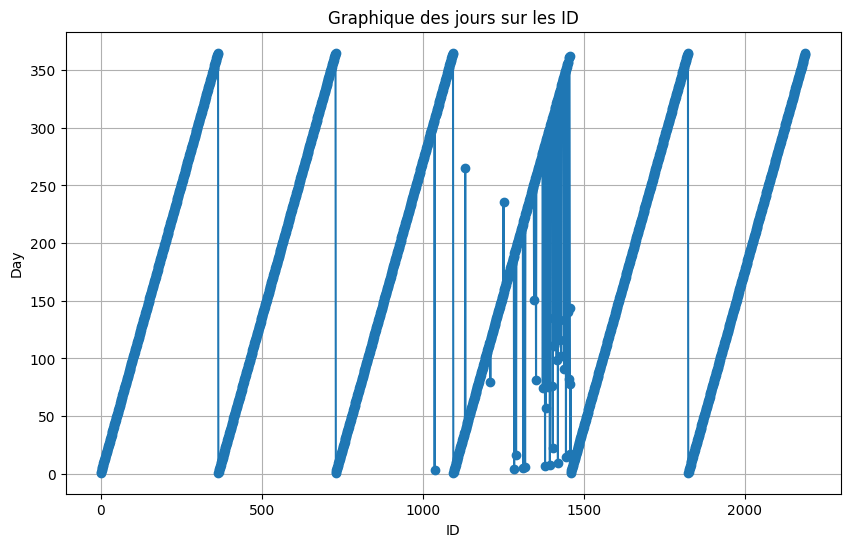

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
# Créer un graphique des jours sur les ID
plt.figure(figsize=(10,6))
plt.plot(df_train.index, df_train["day"], marker='o')
plt.title('Graphique des jours sur les ID')
plt.xlabel('ID')
plt.ylabel('Day')
plt.grid(True)
plt.show()

df_train_original = df_train.copy()

In [156]:
# Convertir les jours en datetime
df_train['Date'] = pd.to_datetime(df_train['day'], format='%j')

In [157]:
df_train['Date'].value_counts()

,count
Date,
1900-04-01,7
1900-05-24,7
1900-09-24,7
1900-05-20,7
1900-04-21,7
...,...
1900-06-06,5
1900-10-13,5
1900-02-07,5


In [158]:
df_train_365 = df_train.head(365).set_index('Date')

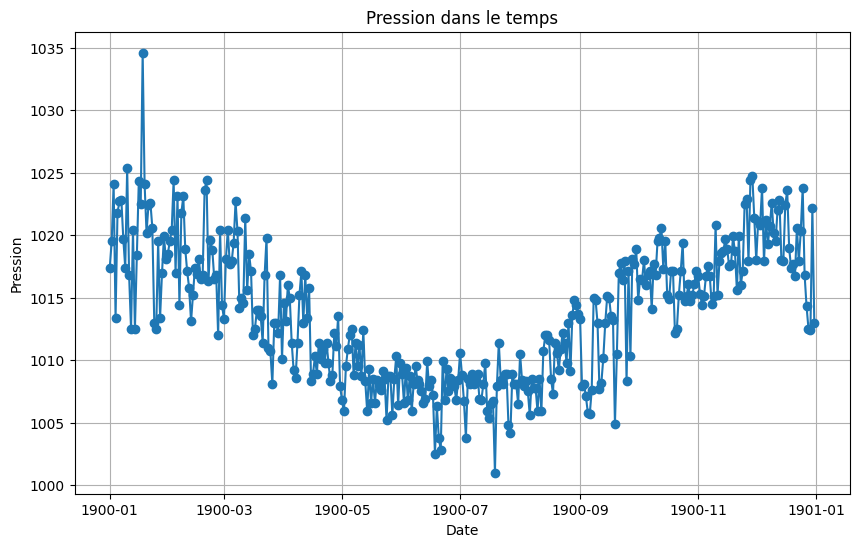

In [159]:
# Afficher la pression dans le temps
plt.figure(figsize=(10,6))
plt.plot(df_train_365.index, df_train_365['pressure'], marker='o')
plt.title('Pression dans le temps')
plt.xlabel('Date')
plt.ylabel('Pression')
plt.grid(True)
plt.show()

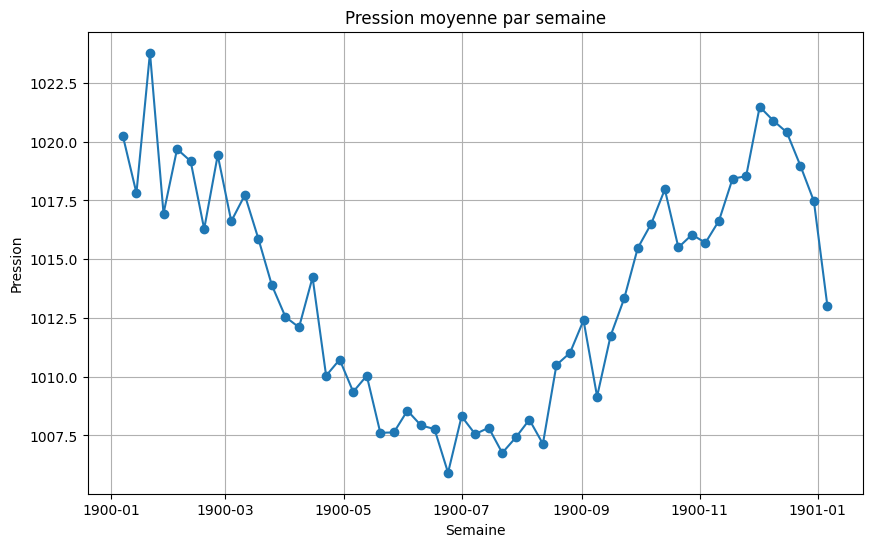

In [160]:
# Resample data to weekly frequency and calculate mean pressure
weekly_pressure = df_train_365['pressure'].resample('W').mean()

# Plot weekly pressure
plt.figure(figsize=(10, 6))
plt.plot(weekly_pressure.index, weekly_pressure, marker='o')
plt.title('Pression moyenne par semaine')
plt.xlabel('Semaine')
plt.ylabel('Pression')
plt.grid(True)
plt.show()

<ipython-input-161-209b8ab97a8d>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weekly_pressure = df_train_365['pressure'].resample('M').mean()


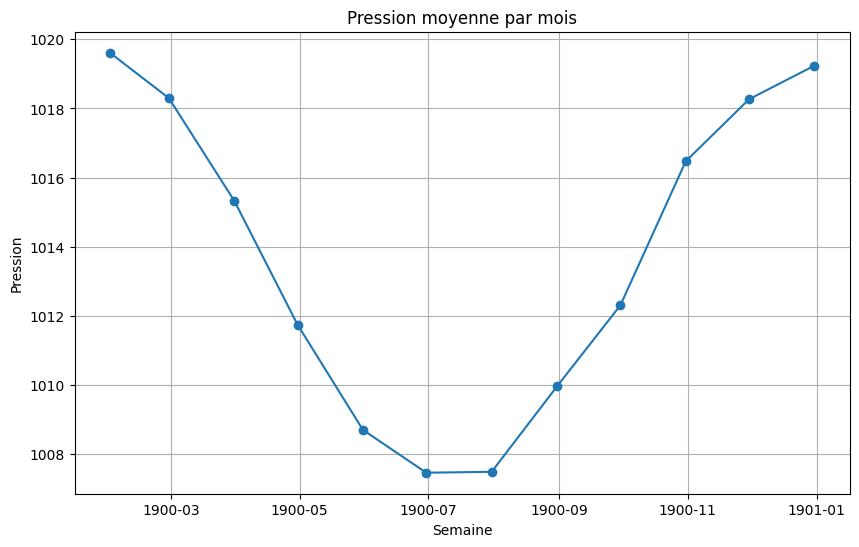

In [161]:
# Resample data to weekly frequency and calculate mean pressure
weekly_pressure = df_train_365['pressure'].resample('M').mean()

# Plot weekly pressure
plt.figure(figsize=(10, 6))
plt.plot(weekly_pressure.index, weekly_pressure, marker='o')
plt.title('Pression moyenne par mois')
plt.xlabel('Semaine')
plt.ylabel('Pression')
plt.grid(True)
plt.show()

In [162]:
import pandas as pd
import numpy as np

# Starting year
start_year = 2001

# Calculate the year for each row based on ID (which is the index)
df_train['year'] = start_year + df_train.index // 365

# Create a datetime column by combining day and year
df_train['Date'] = pd.to_datetime(df_train['day'].astype(str) + '-' + df_train['year'].astype(str), format='%j-%Y')

# Reset the index to default numerical range and preserve ID as a column
df_train = df_train.reset_index()

# Set the Date column as the index
df_train = df_train.set_index('Date')

In [163]:
df_train

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,year
Date,,,,,,,,,,,,,,
2001-01-01,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,2001
2001-01-02,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,2001
2001-01-03,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,2001
2001-01-04,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,2001
2001-01-05,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-27,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1,2006
2006-12-28,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1,2006
2006-12-29,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1,2006


<ipython-input-164-241d0e909484>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  weekly_pressure = df_train['pressure'].resample('M').mean()


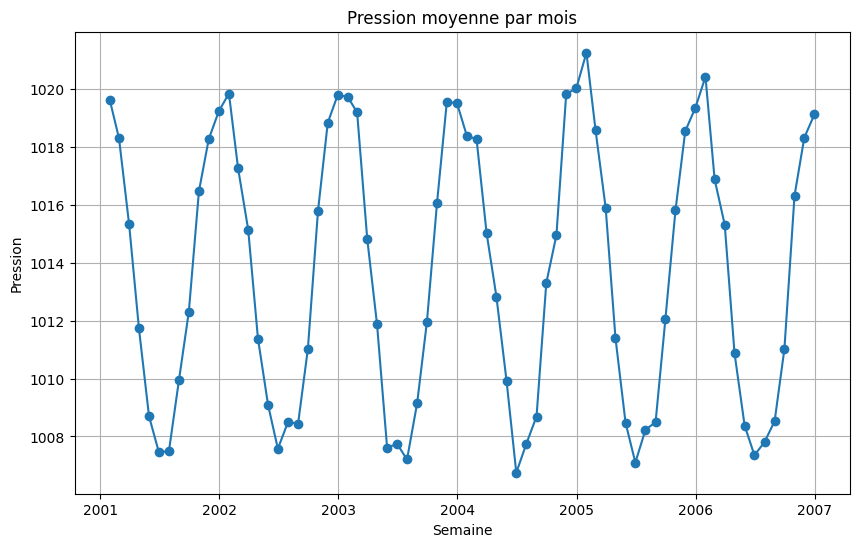

In [164]:
# Resample data to weekly frequency and calculate mean pressure
weekly_pressure = df_train['pressure'].resample('M').mean()

# Plot weekly pressure
plt.figure(figsize=(10, 6))
plt.plot(weekly_pressure.index, weekly_pressure, marker='o')
plt.title('Pression moyenne par mois')
plt.xlabel('Semaine')
plt.ylabel('Pression')
plt.grid(True)
plt.show()

In [165]:
df_train.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall', 'year'],
      dtype='object')

In [166]:
df_train.drop(["day","year"],axis=1,inplace=True)

In [167]:
df_train

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
Date,,,,,,,,,,,,
2001-01-01,0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
2001-01-02,1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2001-01-03,2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
2001-01-04,3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
2001-01-05,4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-27,2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2006-12-28,2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2006-12-29,2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1


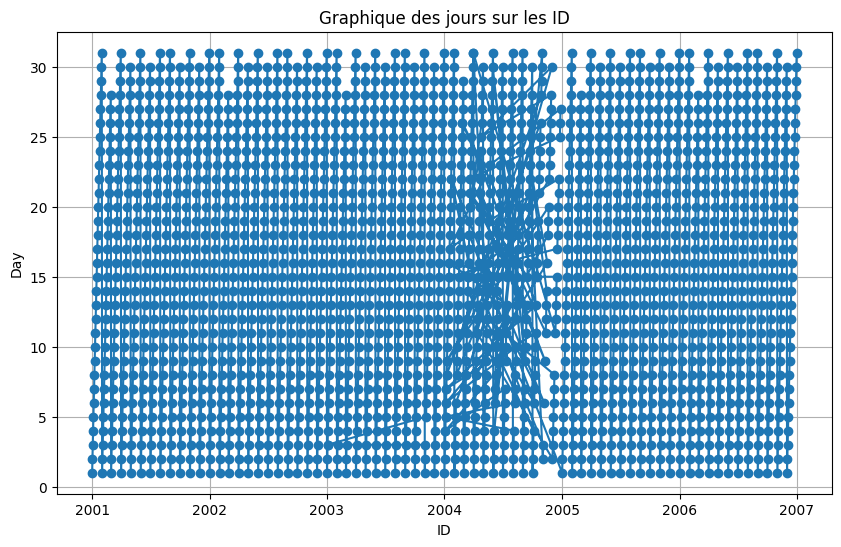

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
day = df_train.index.day
# Créer un graphique des jours sur les ID
plt.figure(figsize=(10,6))
plt.plot(df_train.index, df_train.index.day, marker='o')
plt.title('Graphique des jours sur les ID')
plt.xlabel('ID')
plt.ylabel('Day')
plt.grid(True)
plt.show()

In [169]:
df_train

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
Date,,,,,,,,,,,,
2001-01-01,0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
2001-01-02,1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2001-01-03,2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
2001-01-04,3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
2001-01-05,4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-27,2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2006-12-28,2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2006-12-29,2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1


## manage wrongs dates

In [170]:
import pandas as pd
df_train
# Générer des entiers de 1 à 365 en boucle
days = [i for i in range(1, 366)] * (len(df_train) // 365 + 1)

# Ajuster la liste pour correspondre à la longueur du dataframe
df_train['day'] = days[:len(df_train)]


In [171]:
df_train

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,day
Date,,,,,,,,,,,,,
2001-01-01,0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,1
2001-01-02,1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,2
2001-01-03,2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,3
2001-01-04,3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,4
2001-01-05,4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-27,2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1,361
2006-12-28,2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1,362
2006-12-29,2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1,363


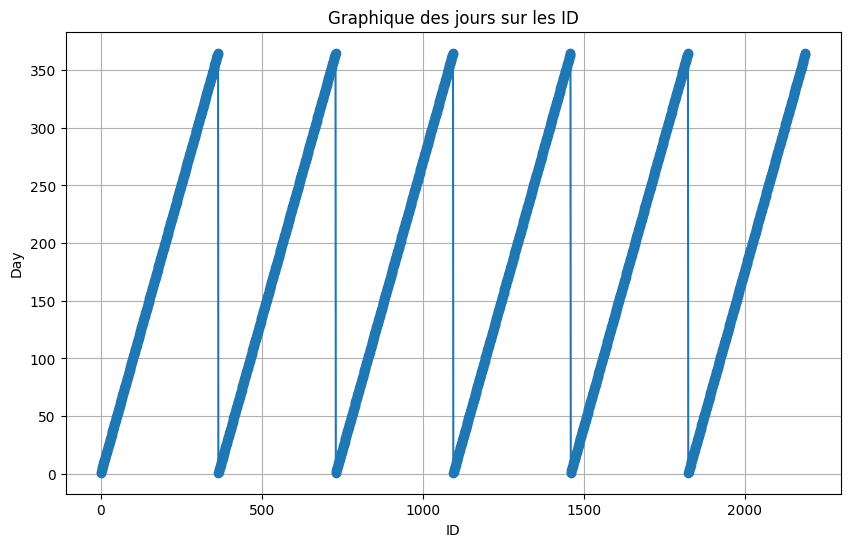

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
# Créer un graphique des jours sur les ID
plt.figure(figsize=(10,6))
plt.plot(df_train.id, df_train["day"], marker='o')
plt.title('Graphique des jours sur les ID')
plt.xlabel('ID')
plt.ylabel('Day')
plt.grid(True)
plt.show()

In [173]:
# Convertir les jours en datetime
df_train['Date'] = pd.to_datetime(df_train['day'], format='%j')

In [174]:
df_train.reset_index(inplace=True,drop=True)

In [175]:
df_train

,id,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,day,Date
0,0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,1,1900-01-01
1,1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,2,1900-01-02
2,2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,3,1900-01-03
3,3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,4,1900-01-04
4,4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,5,1900-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1,361,1900-12-27
2186,2186,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1,362,1900-12-28
2187,2187,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1,363,1900-12-29
2188,2188,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1,364,1900-12-30


In [176]:
# Starting year
start_year = 2001

# Calculate the year for each row based on ID (which is the index)
df_train['year'] = start_year + df_train.index // 365

# Create a datetime column by combining day and year
df_train['Date'] = pd.to_datetime(df_train['day'].astype(str) + '-' + df_train['year'].astype(str), format='%j-%Y')

# Reset the index to default numerical range and preserve ID as a column
df_train = df_train.reset_index()

# Set the Date column as the index
df_train = df_train.set_index('Date')

In [177]:
df_train.drop(["day","year"],axis=1,inplace=True)

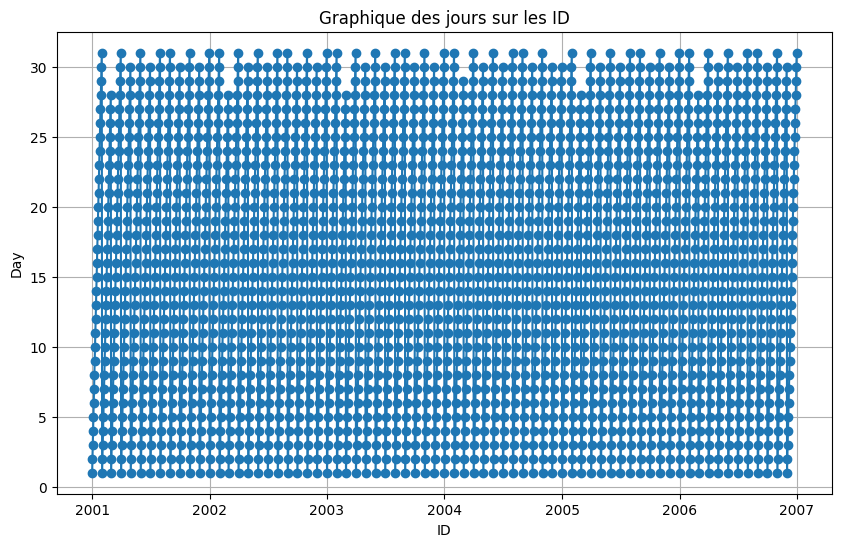

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
day = df_train.index.day
# Créer un graphique des jours sur les ID
plt.figure(figsize=(10,6))
plt.plot(df_train.index, df_train.index.day, marker='o')
plt.title('Graphique des jours sur les ID')
plt.xlabel('ID')
plt.ylabel('Day')
plt.grid(True)
plt.show()

In [179]:
df_train.shape

(2190, 13)

In [180]:
365*5+365

2190

In [181]:
# day mimimum time series
print(df_train.index.min())
# day maximum
print(df_train.index.max())

2001-01-01 00:00:00
2006-12-31 00:00:00


In [182]:
df_train.shape

(2190, 13)

In [183]:
# nombre de jours
df_train.index.nunique()


2190

In [184]:
# nombre de jours par ans
df_train.index.year.value_counts()


,count
Date,
2001,365
2002,365
2003,365
2004,365
2005,365
2006,365


In [185]:
# dernier jours de 2024
df_train[df_train.index.year==2004].index.max()

Timestamp('2004-12-30 00:00:00')

In [186]:
# ca a décaler les dates  de 2004 .

## windirection

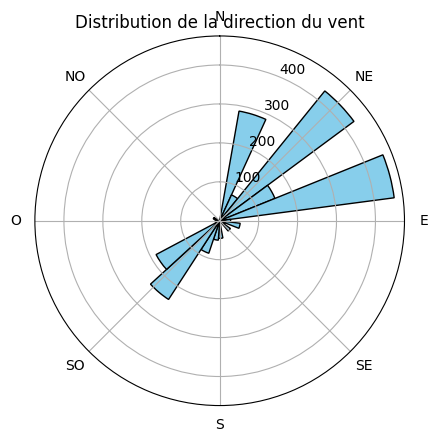

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# Conversion des degrés en radians
wind_direction_rad = np.deg2rad(df_train["winddirection"])

# Créer une figure polaire
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Créer l'histogramme circulaire
ax.hist(wind_direction_rad, bins=20, color='skyblue', edgecolor='black')

# Ajuster la position et le sens du cercle
ax.set_theta_zero_location('N')  # 0° au nord
ax.set_theta_direction(-1)       # Sens horaire

# Définir les points cardinaux
ax.set_xticks(np.radians([0, 45, 90, 135, 180, 225, 270, 315]))
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SO', 'O', 'NO'])

# Titre
plt.title('Distribution de la direction du vent')

# Afficher le graphique
plt.show()


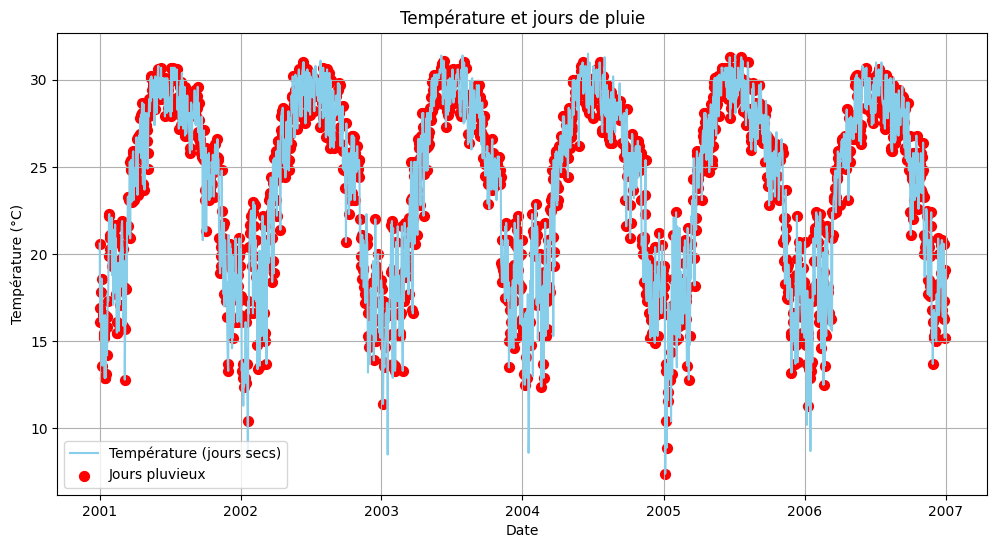

In [191]:
df = df_train
# === Tracer les jours sans pluie ===
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['temparature'], color='skyblue', label='Température (jours secs)')

# === Marquer les jours pluvieux ===
rainy_days = df['rainfall'] > 0
plt.scatter(df.index[rainy_days], df['temparature'][rainy_days], color='red', label='Jours pluvieux', s=50)

# === Mise en forme ===
plt.title('Température et jours de pluie')
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.legend()
plt.grid(True)

# === Affichage ===
plt.show()

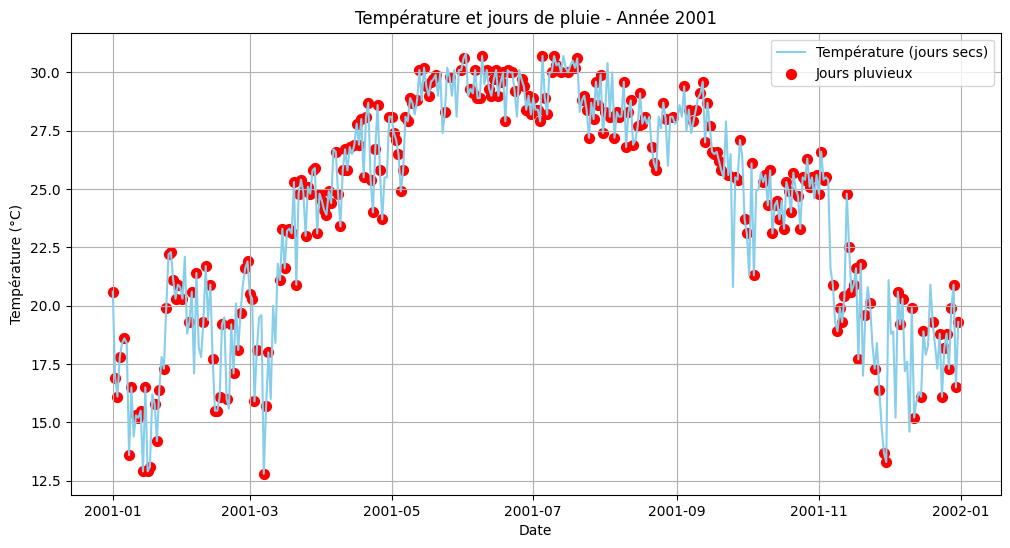

In [193]:
import matplotlib.pyplot as plt

# Filtrer les données pour une seule année (exemple : 2003)
year = 2001
df_year = df[df.index.year == year]

# === Tracer les jours sans pluie ===
plt.figure(figsize=(12, 6))
plt.plot(df_year.index, df_year['temparature'], color='skyblue', label='Température (jours secs)')

# === Marquer les jours pluvieux ===
rainy_days = df_year['rainfall'] > 0
plt.scatter(df_year.index[rainy_days], df_year['temparature'][rainy_days], color='red', label='Jours pluvieux', s=50)

# === Mise en forme ===
plt.title(f'Température et jours de pluie - Année {year}')
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.legend()
plt.grid(True)

# === Affichage ===
plt.show()
